<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/ccaudek/ds4psy_2023/blob/main/035_intro_matplotlib.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>

(intro-matplotlib-notebook)=
# Matplotlib 

Matplotlib è una libreria di visualizzazione in Python che permette di creare una vasta gamma di figure statiche, animate e interattive. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%config InlineBackend.figure_format = 'retina'

RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)

from aquarel import load_theme
theme = load_theme("minimal_light")
theme.apply()
sns.set_palette("colorblind")

## Il ruolo delle funzioni pyplot nella creazione di grafici

Una delle interfacce più usate di Matplotlib è `pyplot`, progettata per fornire un modo intuitivo e facile per creare grafici. Ma cosa fa realmente ogni funzione di pyplot?

Immaginate di essere pittori e la figura come la vostra tela. Ogni funzione di pyplot è simile a un pennello o a un utensile che vi permette di aggiungere elementi o dettagli a questa tela. 

- **Iniziamo con una tela vuota**: La funzione `plt.figure()` ci fornisce una nuova "tela" su cui lavorare. È come aprire un nuovo foglio di carta su cui disegnerete il vostro grafico.

- **Disegniamo le nostre aree di interesse**: Una volta che abbiamo la nostra tela, utilizziamo `plt.subplot()` o `plt.axes()` per definire le specifiche aree (o "axes") all'interno della figura dove posizioneremo i nostri grafici. Queste aree di tracciamento possono essere pensate come i "quadranti" della nostra tela, in cui ogni grafico avrà il suo spazio dedicato.

- **Aggiungiamo i contorni e i dettagli**: Con le aree di tracciamento pronte, possiamo iniziare a popolarle. Che si tratti di linee con `plt.plot()`, punti con `plt.scatter()`, o altre forme geometriche, ogni funzione di pyplot aggiunge un nuovo elemento al nostro disegno, arricchendo la nostra visualizzazione.

- **Forniamo il contesto**: Un grafico senza etichette o titoli è come un libro senza un titolo o capitoli. Utilizziamo `plt.xlabel()`, `plt.ylabel()`, e `plt.title()` per aggiungere etichette e titoli, rendendo il nostro grafico comprensibile e informativo.

## Funzionalità di base per la creazione di grafici

Ora che abbiamo una comprensione intuitiva del ruolo delle funzioni di `pyplot`, esploriamo alcune delle funzioni di base più utilizzate:

- **Creare grafici lineari**: La funzione `plt.plot(x, y)` consente di tracciare linee e marcatori. Fornite le coordinate `x` e `y`, e questa funzione disegnerà il grafico per voi.
  
- **Etichettare gli assi**: Dare un nome agli assi è cruciale per la comprensione del grafico. Utilizzate `plt.xlabel('Nome')` per l'asse delle ascisse e `plt.ylabel('Nome')` per l'asse delle ordinate.
  
- **Titolo del grafico**: Un buon titolo fornisce una panoramica immediata del contenuto del grafico. Aggiungete un titolo usando `plt.title('Titolo')`.

- **Legenda**: Per grafici con più linee o forme, una legenda è indispensabile. Usate `plt.legend()` per aggiungere una legenda che distingue tra i diversi elementi del grafico.

- **Mostrare il grafico**: Infine, dopo aver aggiunto tutti gli elementi e i dettagli, è il momento di mostrare il vostro lavoro. Utilizzate `plt.show()` per visualizzare il grafico.

## Esempio 1: Grafico lineare semplice

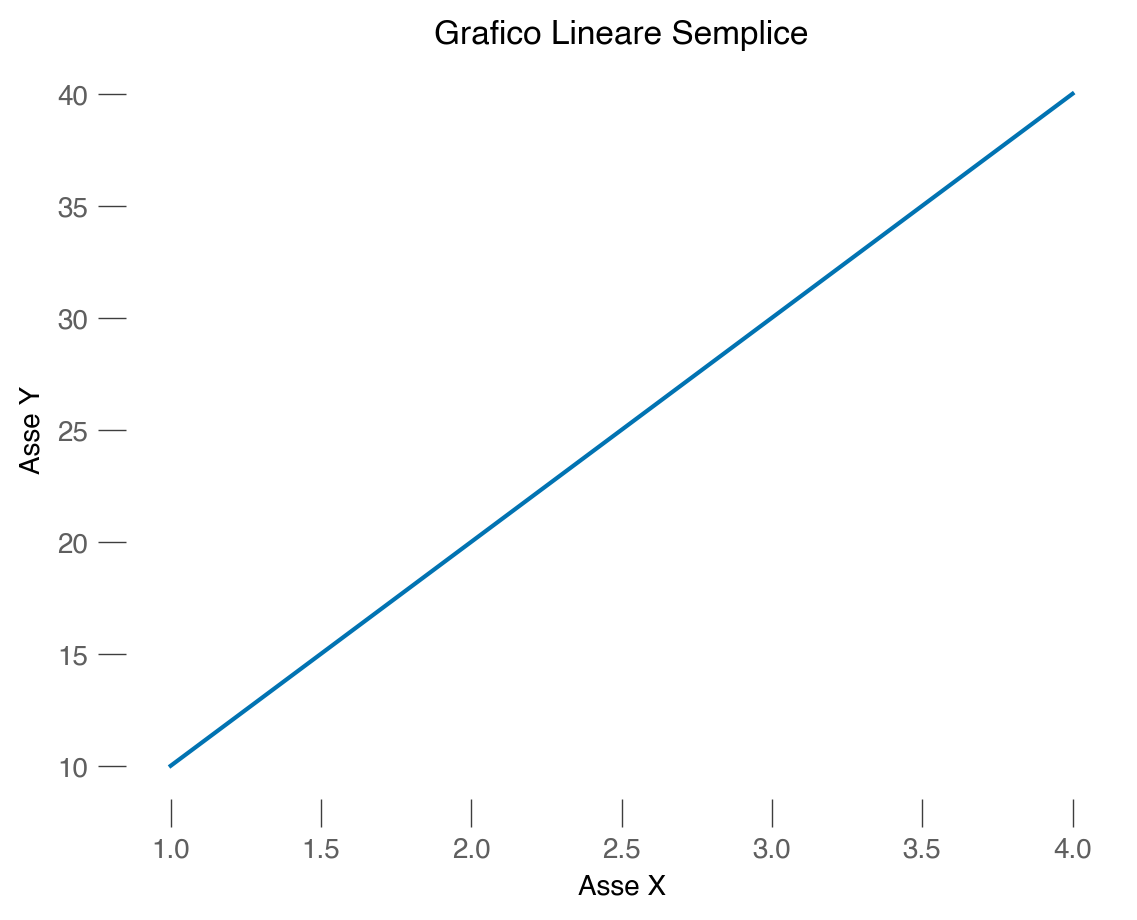

In [9]:
x = [1, 2, 3, 4]
y = [10, 20, 30, 40]

plt.plot(x, y)
plt.xlabel("Asse X")
plt.ylabel("Asse Y")
plt.title("Grafico Lineare Semplice");

## Esempio 2: Grafico con legenda e stile

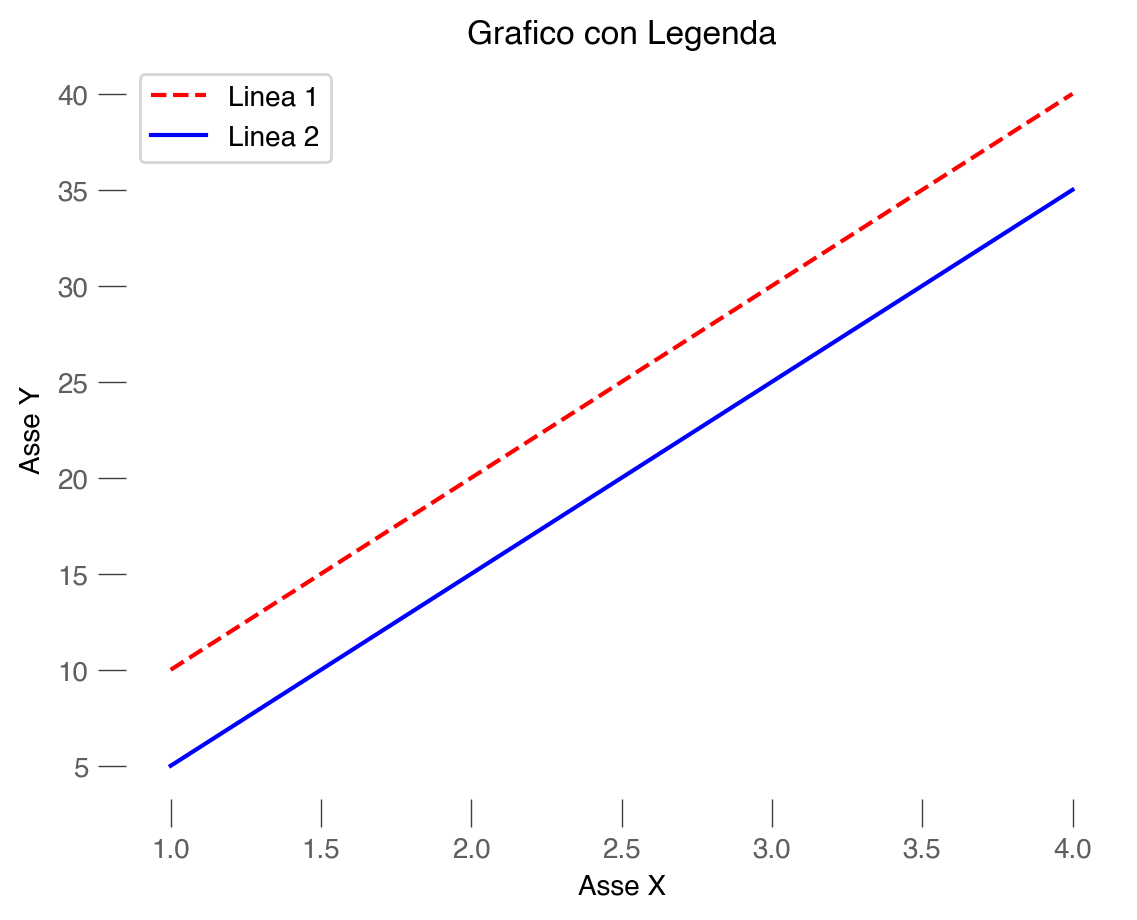

In [10]:
x = [1, 2, 3, 4]
y1 = [10, 20, 30, 40]
y2 = [5, 15, 25, 35]

plt.plot(x, y1, label="Linea 1", color="red", linestyle="--")
plt.plot(x, y2, label="Linea 2", color="blue", linestyle="-")
plt.xlabel("Asse X")
plt.ylabel("Asse Y")
plt.title("Grafico con Legenda")
plt.legend();

## Esempio 3: Istogramma

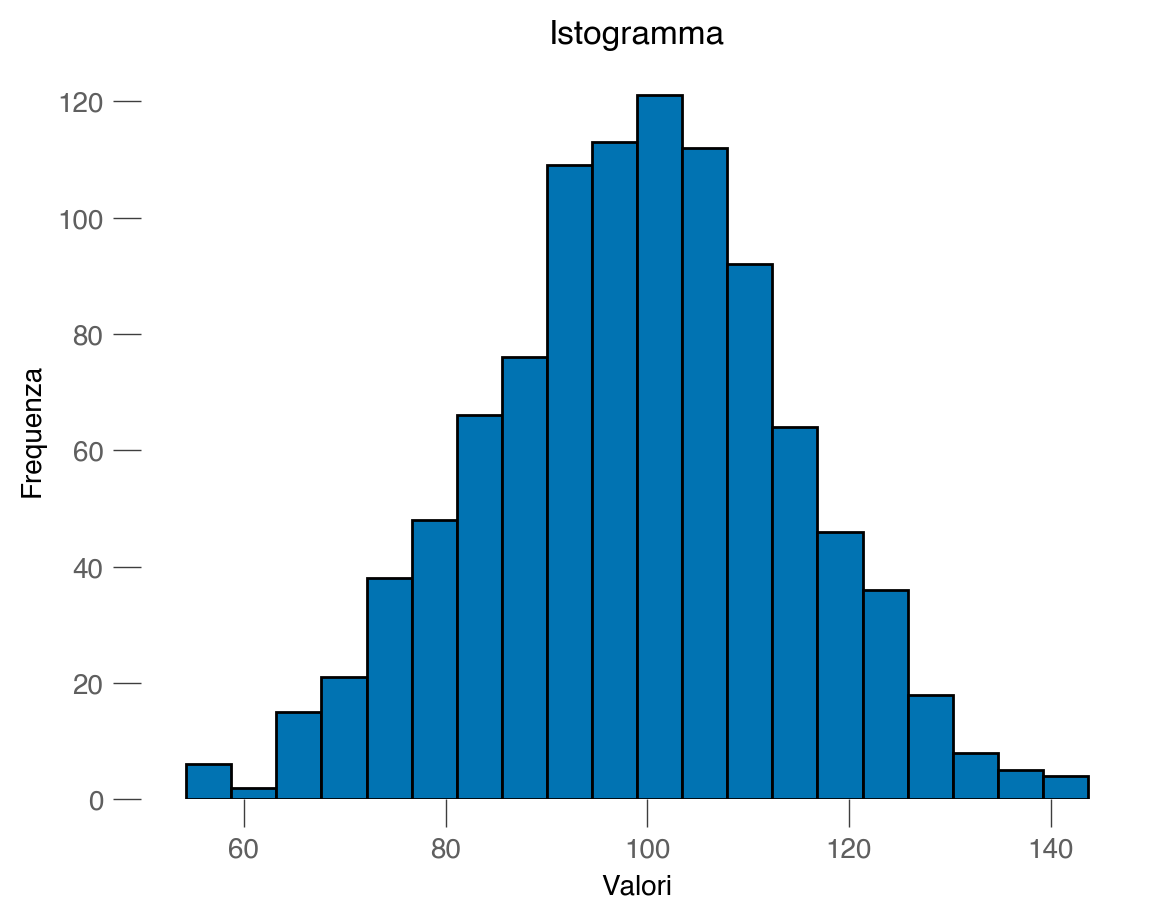

In [11]:
data = rng.normal(100, 15, 1000)

plt.hist(data, bins=20, color="C0", edgecolor="black")
plt.xlabel("Valori")
plt.ylabel("Frequenza")
plt.title("Istogramma");

## Esempio 4: pannelli multipli

Facciamo un altro esempio usando i dati `penguins.csv`.

In [7]:
df = pd.read_csv("../data/penguins.csv")
df.dropna(inplace=True)

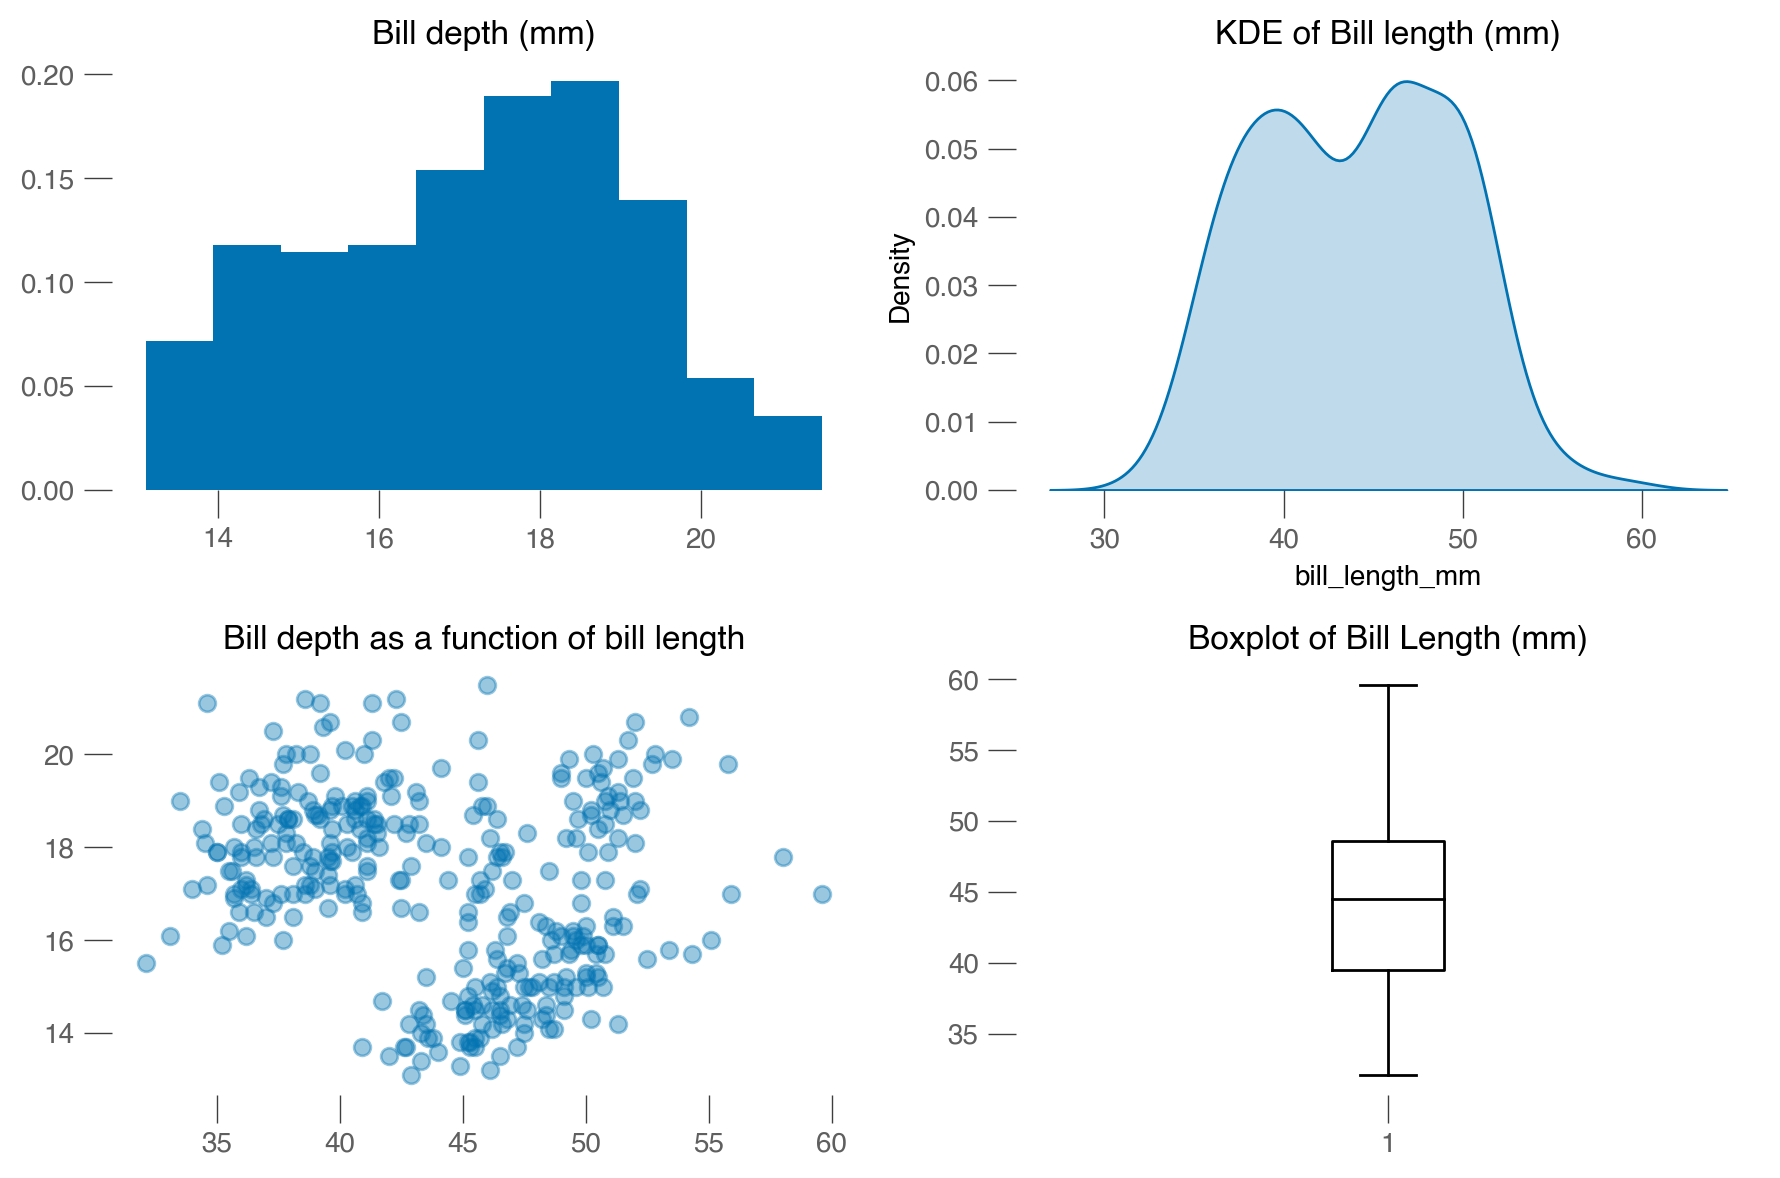

In [8]:
plt.figure(figsize=(9, 6))

plt.subplot(2, 2, 1)
plt.hist(df["bill_depth_mm"], 10, density=True)
plt.title("Bill depth (mm)")

plt.subplot(2, 2, 2)
sns.kdeplot(df["bill_length_mm"], fill=True)
plt.title("KDE of Bill length (mm)")

plt.subplot(2, 2, 3)
plt.scatter(x=df["bill_length_mm"], y=df["bill_depth_mm"], alpha=0.4)
plt.title("Bill depth as a function of bill length")

plt.subplot(2, 2, 4)
plt.boxplot(df["bill_length_mm"])
plt.title("Boxplot of Bill Length (mm)")

plt.tight_layout()

Gli indici in `plt.subplot()` sono utilizzati per specificare come dividere una figura in diverse aree di tracciamento, chiamate "subplots". La funzione `plt.subplot(nrows, ncols, index)` prende tre argomenti principali:

- `nrows`: Numero di righe in cui la figura sarà suddivisa.
- `ncols`: Numero di colonne in cui la figura sarà suddivisa.
- `index`: Indice del subplot su cui operare, partendo dall'angolo in alto a sinistra e proseguendo da sinistra a destra e dall'alto in basso.

Nel codice precedente, `plt.subplot(2, 2, 1)` indica che la figura sarà divisa in una griglia 2x2 (2 righe e 2 colonne) e che la funzione `plt.hist()` agirà sul primo subplot, che si troverà nell'angolo in alto a sinistra.

Gli altri indici (`2`, `3`, `4`) selezionano rispettivamente il secondo subplot (in alto a destra), il terzo subplot (in basso a sinistra) e il quarto subplot (in basso a destra) della griglia 2x2.

Ecco come i subplot sono organizzati sulla figura:

```
+---------------------+----------------------+
|  plt.subplot(2,2,1) |  plt.subplot(2,2,2)  |
+---------------------+----------------------+
|  plt.subplot(2,2,3) |  plt.subplot(2,2,4)  |
+---------------------+----------------------+
```

Ogni volta che si chiama `plt.subplot()` con un nuovo indice, il "current axes" cambia per puntare al subplot specificato. Quindi, le funzioni di tracciamento come `plt.hist()`, `sns.kdeplot()`, `plt.scatter()` e `plt.boxplot()` saranno applicate al subplot attualmente selezionato.

## Watermark

In [6]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Sun Aug 13 2023

Python implementation: CPython
Python version       : 3.11.4
IPython version      : 8.14.0

pandas    : 2.0.3
numpy     : 1.25.2
matplotlib: 3.7.2

Watermark: 2.4.3

